# GCN

In [94]:
import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim
from gcn.models import GCN
from gcn.utils import load_data, accuracy
import matplotlib.pyplot as plt

In [86]:
use_cuda = torch.cuda.is_available()
np.random.seed(42)
torch.manual_seed(42)

if use_cuda:
    torch.cuda.manual_seed(42)



In [87]:
# Load data
adj, features, labels, idx_train, idx_val, idx_test, idx, idx_map = load_data(split=[0.8, 0.1, 0.1], path="./cora/")
# split dataset into train, validation and test for 8:1:1

if use_cuda:
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()
    


Loading cora dataset...


In [88]:
def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    if not fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        output = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))
    return loss_train.item(), loss_val.item(), acc_train.item(), acc_val.item()

In [124]:
def test():
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))
    return acc_test.item()

In [125]:
# Hyper parameters
lr = 1e-3  # Initial learning rate.
weight_decay = 5e-4  # Weight decay (L2 loss on parameters).
hidden = 16  # Number of hidden units.
dropout = 0.5 # Dropout rate (1 - keep probability).
epochs = 2500  # Number of epochs to train.
fastmode = False # Validate during training pass.

In [126]:
# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
optimizer = optim.Adam(model.parameters(),
                       lr=lr, weight_decay=weight_decay)

if use_cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()

In [127]:
# Train model
t_total = time.time()
acc_trains, acc_vals, loss_trains, loss_vals = [], [], [], []
for epoch in range(epochs):
    loss_train, loss_val, acc_train, acc_val = train(epoch)
    acc_trains.append(acc_train)
    acc_vals.append(acc_val)
    loss_trains.append(loss_train)
    loss_vals.append(loss_val)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
acc_test = test()

Epoch: 0001 loss_train: 1.9256 acc_train: 0.1556 loss_val: 1.9314 acc_val: 0.1513 time: 0.0107s
Epoch: 0002 loss_train: 1.9276 acc_train: 0.1556 loss_val: 1.9300 acc_val: 0.1513 time: 0.0073s
Epoch: 0003 loss_train: 1.9270 acc_train: 0.1556 loss_val: 1.9286 acc_val: 0.1513 time: 0.0069s
Epoch: 0004 loss_train: 1.9233 acc_train: 0.1556 loss_val: 1.9272 acc_val: 0.1513 time: 0.0072s
Epoch: 0005 loss_train: 1.9266 acc_train: 0.1556 loss_val: 1.9258 acc_val: 0.1513 time: 0.0075s
Epoch: 0006 loss_train: 1.9195 acc_train: 0.1556 loss_val: 1.9244 acc_val: 0.1513 time: 0.0066s
Epoch: 0007 loss_train: 1.9214 acc_train: 0.1556 loss_val: 1.9230 acc_val: 0.1513 time: 0.0067s
Epoch: 0008 loss_train: 1.9190 acc_train: 0.1556 loss_val: 1.9216 acc_val: 0.1513 time: 0.0071s
Epoch: 0009 loss_train: 1.9178 acc_train: 0.1556 loss_val: 1.9202 acc_val: 0.1513 time: 0.0069s
Epoch: 0010 loss_train: 1.9153 acc_train: 0.1556 loss_val: 1.9188 acc_val: 0.1513 time: 0.0071s
Epoch: 0011 loss_train: 1.9169 acc_train

Epoch: 0102 loss_train: 1.8224 acc_train: 0.3033 loss_val: 1.8111 acc_val: 0.2989 time: 0.0073s
Epoch: 0103 loss_train: 1.8156 acc_train: 0.3089 loss_val: 1.8102 acc_val: 0.2989 time: 0.0071s
Epoch: 0104 loss_train: 1.8175 acc_train: 0.3029 loss_val: 1.8093 acc_val: 0.2989 time: 0.0069s
Epoch: 0105 loss_train: 1.8169 acc_train: 0.3084 loss_val: 1.8084 acc_val: 0.2989 time: 0.0069s
Epoch: 0106 loss_train: 1.8170 acc_train: 0.3047 loss_val: 1.8075 acc_val: 0.2989 time: 0.0067s
Epoch: 0107 loss_train: 1.8137 acc_train: 0.3107 loss_val: 1.8067 acc_val: 0.2989 time: 0.0064s
Epoch: 0108 loss_train: 1.8127 acc_train: 0.3084 loss_val: 1.8058 acc_val: 0.2989 time: 0.0069s
Epoch: 0109 loss_train: 1.8141 acc_train: 0.3098 loss_val: 1.8050 acc_val: 0.2952 time: 0.0070s
Epoch: 0110 loss_train: 1.8237 acc_train: 0.3015 loss_val: 1.8041 acc_val: 0.2952 time: 0.0067s
Epoch: 0111 loss_train: 1.8153 acc_train: 0.3084 loss_val: 1.8033 acc_val: 0.2952 time: 0.0068s
Epoch: 0112 loss_train: 1.8070 acc_train

Epoch: 0206 loss_train: 1.7303 acc_train: 0.3038 loss_val: 1.7360 acc_val: 0.2952 time: 0.0072s
Epoch: 0207 loss_train: 1.7410 acc_train: 0.3029 loss_val: 1.7353 acc_val: 0.2952 time: 0.0069s
Epoch: 0208 loss_train: 1.7443 acc_train: 0.3033 loss_val: 1.7346 acc_val: 0.2952 time: 0.0072s
Epoch: 0209 loss_train: 1.7332 acc_train: 0.3033 loss_val: 1.7338 acc_val: 0.2952 time: 0.0064s
Epoch: 0210 loss_train: 1.7441 acc_train: 0.3024 loss_val: 1.7331 acc_val: 0.2952 time: 0.0068s
Epoch: 0211 loss_train: 1.7294 acc_train: 0.3042 loss_val: 1.7323 acc_val: 0.2952 time: 0.0071s
Epoch: 0212 loss_train: 1.7338 acc_train: 0.3019 loss_val: 1.7316 acc_val: 0.2952 time: 0.0067s
Epoch: 0213 loss_train: 1.7404 acc_train: 0.3047 loss_val: 1.7308 acc_val: 0.2952 time: 0.0067s
Epoch: 0214 loss_train: 1.7479 acc_train: 0.3047 loss_val: 1.7300 acc_val: 0.2952 time: 0.0067s
Epoch: 0215 loss_train: 1.7304 acc_train: 0.3033 loss_val: 1.7293 acc_val: 0.2952 time: 0.0073s
Epoch: 0216 loss_train: 1.7342 acc_train

Epoch: 0307 loss_train: 1.6411 acc_train: 0.3315 loss_val: 1.6407 acc_val: 0.3063 time: 0.0076s
Epoch: 0308 loss_train: 1.6376 acc_train: 0.3250 loss_val: 1.6396 acc_val: 0.3063 time: 0.0069s
Epoch: 0309 loss_train: 1.6378 acc_train: 0.3255 loss_val: 1.6384 acc_val: 0.3063 time: 0.0068s
Epoch: 0310 loss_train: 1.6354 acc_train: 0.3403 loss_val: 1.6372 acc_val: 0.3063 time: 0.0070s
Epoch: 0311 loss_train: 1.6341 acc_train: 0.3292 loss_val: 1.6360 acc_val: 0.3063 time: 0.0068s
Epoch: 0312 loss_train: 1.6325 acc_train: 0.3398 loss_val: 1.6348 acc_val: 0.3063 time: 0.0067s
Epoch: 0313 loss_train: 1.6291 acc_train: 0.3352 loss_val: 1.6336 acc_val: 0.3063 time: 0.0069s
Epoch: 0314 loss_train: 1.6316 acc_train: 0.3329 loss_val: 1.6323 acc_val: 0.3063 time: 0.0071s
Epoch: 0315 loss_train: 1.6327 acc_train: 0.3407 loss_val: 1.6311 acc_val: 0.3063 time: 0.0071s
Epoch: 0316 loss_train: 1.6218 acc_train: 0.3393 loss_val: 1.6300 acc_val: 0.3063 time: 0.0066s
Epoch: 0317 loss_train: 1.6329 acc_train

Epoch: 0410 loss_train: 1.4983 acc_train: 0.4017 loss_val: 1.5097 acc_val: 0.3542 time: 0.0076s
Epoch: 0411 loss_train: 1.5052 acc_train: 0.3998 loss_val: 1.5084 acc_val: 0.3542 time: 0.0068s
Epoch: 0412 loss_train: 1.4974 acc_train: 0.4164 loss_val: 1.5071 acc_val: 0.3542 time: 0.0068s
Epoch: 0413 loss_train: 1.5023 acc_train: 0.3998 loss_val: 1.5059 acc_val: 0.3542 time: 0.0071s
Epoch: 0414 loss_train: 1.4985 acc_train: 0.4081 loss_val: 1.5046 acc_val: 0.3542 time: 0.0069s
Epoch: 0415 loss_train: 1.4936 acc_train: 0.4067 loss_val: 1.5033 acc_val: 0.3542 time: 0.0068s
Epoch: 0416 loss_train: 1.4944 acc_train: 0.4026 loss_val: 1.5021 acc_val: 0.3542 time: 0.0069s
Epoch: 0417 loss_train: 1.4916 acc_train: 0.4072 loss_val: 1.5008 acc_val: 0.3542 time: 0.0066s
Epoch: 0418 loss_train: 1.4943 acc_train: 0.3970 loss_val: 1.4995 acc_val: 0.3542 time: 0.0070s
Epoch: 0419 loss_train: 1.4868 acc_train: 0.4026 loss_val: 1.4982 acc_val: 0.3542 time: 0.0067s
Epoch: 0420 loss_train: 1.4935 acc_train

Epoch: 0511 loss_train: 1.3691 acc_train: 0.5683 loss_val: 1.3726 acc_val: 0.5240 time: 0.0076s
Epoch: 0512 loss_train: 1.3603 acc_train: 0.5780 loss_val: 1.3711 acc_val: 0.5240 time: 0.0067s
Epoch: 0513 loss_train: 1.3594 acc_train: 0.5762 loss_val: 1.3697 acc_val: 0.5240 time: 0.0065s
Epoch: 0514 loss_train: 1.3558 acc_train: 0.5757 loss_val: 1.3682 acc_val: 0.5240 time: 0.0074s
Epoch: 0515 loss_train: 1.3632 acc_train: 0.5831 loss_val: 1.3667 acc_val: 0.5240 time: 0.0073s
Epoch: 0516 loss_train: 1.3586 acc_train: 0.5683 loss_val: 1.3653 acc_val: 0.5240 time: 0.0064s
Epoch: 0517 loss_train: 1.3476 acc_train: 0.5965 loss_val: 1.3638 acc_val: 0.5240 time: 0.0066s
Epoch: 0518 loss_train: 1.3713 acc_train: 0.5656 loss_val: 1.3624 acc_val: 0.5240 time: 0.0070s
Epoch: 0519 loss_train: 1.3707 acc_train: 0.5651 loss_val: 1.3609 acc_val: 0.5240 time: 0.0068s
Epoch: 0520 loss_train: 1.3565 acc_train: 0.5743 loss_val: 1.3595 acc_val: 0.5240 time: 0.0069s
Epoch: 0521 loss_train: 1.3522 acc_train

Epoch: 0613 loss_train: 1.2364 acc_train: 0.6602 loss_val: 1.2374 acc_val: 0.6310 time: 0.0074s
Epoch: 0614 loss_train: 1.2337 acc_train: 0.6690 loss_val: 1.2362 acc_val: 0.6310 time: 0.0068s
Epoch: 0615 loss_train: 1.2260 acc_train: 0.6676 loss_val: 1.2349 acc_val: 0.6310 time: 0.0073s
Epoch: 0616 loss_train: 1.2248 acc_train: 0.6620 loss_val: 1.2337 acc_val: 0.6310 time: 0.0070s
Epoch: 0617 loss_train: 1.2366 acc_train: 0.6644 loss_val: 1.2324 acc_val: 0.6310 time: 0.0066s
Epoch: 0618 loss_train: 1.2379 acc_train: 0.6620 loss_val: 1.2312 acc_val: 0.6347 time: 0.0068s
Epoch: 0619 loss_train: 1.2406 acc_train: 0.6616 loss_val: 1.2300 acc_val: 0.6347 time: 0.0069s
Epoch: 0620 loss_train: 1.2364 acc_train: 0.6648 loss_val: 1.2288 acc_val: 0.6347 time: 0.0065s
Epoch: 0621 loss_train: 1.2277 acc_train: 0.6694 loss_val: 1.2276 acc_val: 0.6347 time: 0.0068s
Epoch: 0622 loss_train: 1.2212 acc_train: 0.6630 loss_val: 1.2265 acc_val: 0.6347 time: 0.0071s
Epoch: 0623 loss_train: 1.2386 acc_train

Epoch: 0716 loss_train: 1.1359 acc_train: 0.6990 loss_val: 1.1274 acc_val: 0.7085 time: 0.0077s
Epoch: 0717 loss_train: 1.1303 acc_train: 0.6865 loss_val: 1.1264 acc_val: 0.7085 time: 0.0066s
Epoch: 0718 loss_train: 1.1036 acc_train: 0.7082 loss_val: 1.1254 acc_val: 0.7085 time: 0.0066s
Epoch: 0719 loss_train: 1.1200 acc_train: 0.6948 loss_val: 1.1245 acc_val: 0.7085 time: 0.0066s
Epoch: 0720 loss_train: 1.1117 acc_train: 0.6898 loss_val: 1.1235 acc_val: 0.7085 time: 0.0069s
Epoch: 0721 loss_train: 1.1102 acc_train: 0.6911 loss_val: 1.1226 acc_val: 0.7048 time: 0.0066s
Epoch: 0722 loss_train: 1.1169 acc_train: 0.7013 loss_val: 1.1216 acc_val: 0.7048 time: 0.0066s
Epoch: 0723 loss_train: 1.1405 acc_train: 0.7027 loss_val: 1.1207 acc_val: 0.7048 time: 0.0069s
Epoch: 0724 loss_train: 1.1180 acc_train: 0.6953 loss_val: 1.1198 acc_val: 0.7048 time: 0.0071s
Epoch: 0725 loss_train: 1.1159 acc_train: 0.6999 loss_val: 1.1188 acc_val: 0.7048 time: 0.0065s
Epoch: 0726 loss_train: 1.1050 acc_train

Epoch: 0820 loss_train: 1.0508 acc_train: 0.7262 loss_val: 1.0368 acc_val: 0.7269 time: 0.0075s
Epoch: 0821 loss_train: 1.0462 acc_train: 0.7184 loss_val: 1.0361 acc_val: 0.7232 time: 0.0067s
Epoch: 0822 loss_train: 1.0327 acc_train: 0.7161 loss_val: 1.0353 acc_val: 0.7232 time: 0.0067s
Epoch: 0823 loss_train: 1.0221 acc_train: 0.7091 loss_val: 1.0346 acc_val: 0.7269 time: 0.0066s
Epoch: 0824 loss_train: 1.0568 acc_train: 0.7045 loss_val: 1.0339 acc_val: 0.7269 time: 0.0070s
Epoch: 0825 loss_train: 1.0321 acc_train: 0.7207 loss_val: 1.0331 acc_val: 0.7269 time: 0.0066s
Epoch: 0826 loss_train: 1.0387 acc_train: 0.7073 loss_val: 1.0324 acc_val: 0.7306 time: 0.0066s
Epoch: 0827 loss_train: 1.0319 acc_train: 0.7202 loss_val: 1.0316 acc_val: 0.7306 time: 0.0070s
Epoch: 0828 loss_train: 1.0334 acc_train: 0.7216 loss_val: 1.0308 acc_val: 0.7306 time: 0.0072s
Epoch: 0829 loss_train: 1.0337 acc_train: 0.7105 loss_val: 1.0300 acc_val: 0.7306 time: 0.0064s
Epoch: 0830 loss_train: 1.0263 acc_train

Epoch: 0922 loss_train: 0.9693 acc_train: 0.7470 loss_val: 0.9653 acc_val: 0.7528 time: 0.0071s
Epoch: 0923 loss_train: 0.9817 acc_train: 0.7382 loss_val: 0.9647 acc_val: 0.7528 time: 0.0074s
Epoch: 0924 loss_train: 0.9721 acc_train: 0.7438 loss_val: 0.9640 acc_val: 0.7528 time: 0.0070s
Epoch: 0925 loss_train: 0.9608 acc_train: 0.7530 loss_val: 0.9633 acc_val: 0.7491 time: 0.0066s
Epoch: 0926 loss_train: 0.9726 acc_train: 0.7415 loss_val: 0.9627 acc_val: 0.7491 time: 0.0068s
Epoch: 0927 loss_train: 0.9817 acc_train: 0.7447 loss_val: 0.9620 acc_val: 0.7491 time: 0.0070s
Epoch: 0928 loss_train: 0.9496 acc_train: 0.7548 loss_val: 0.9614 acc_val: 0.7528 time: 0.0068s
Epoch: 0929 loss_train: 0.9379 acc_train: 0.7553 loss_val: 0.9607 acc_val: 0.7528 time: 0.0069s
Epoch: 0930 loss_train: 0.9755 acc_train: 0.7452 loss_val: 0.9601 acc_val: 0.7528 time: 0.0068s
Epoch: 0931 loss_train: 0.9734 acc_train: 0.7355 loss_val: 0.9595 acc_val: 0.7528 time: 0.0067s
Epoch: 0932 loss_train: 0.9569 acc_train

Epoch: 1024 loss_train: 0.9126 acc_train: 0.7530 loss_val: 0.9047 acc_val: 0.7897 time: 0.0076s
Epoch: 1025 loss_train: 0.9128 acc_train: 0.7779 loss_val: 0.9042 acc_val: 0.7897 time: 0.0066s
Epoch: 1026 loss_train: 0.8888 acc_train: 0.7752 loss_val: 0.9036 acc_val: 0.7897 time: 0.0074s
Epoch: 1027 loss_train: 0.9029 acc_train: 0.7650 loss_val: 0.9030 acc_val: 0.7897 time: 0.0071s
Epoch: 1028 loss_train: 0.9164 acc_train: 0.7724 loss_val: 0.9025 acc_val: 0.7934 time: 0.0069s
Epoch: 1029 loss_train: 0.9101 acc_train: 0.7701 loss_val: 0.9020 acc_val: 0.7934 time: 0.0070s
Epoch: 1030 loss_train: 0.9153 acc_train: 0.7715 loss_val: 0.9015 acc_val: 0.7934 time: 0.0070s
Epoch: 1031 loss_train: 0.9091 acc_train: 0.7761 loss_val: 0.9010 acc_val: 0.7934 time: 0.0067s
Epoch: 1032 loss_train: 0.9065 acc_train: 0.7747 loss_val: 0.9005 acc_val: 0.7934 time: 0.0070s
Epoch: 1033 loss_train: 0.9065 acc_train: 0.7682 loss_val: 0.9000 acc_val: 0.7934 time: 0.0068s
Epoch: 1034 loss_train: 0.9185 acc_train

Epoch: 1128 loss_train: 0.8597 acc_train: 0.7964 loss_val: 0.8540 acc_val: 0.8192 time: 0.0072s
Epoch: 1129 loss_train: 0.8659 acc_train: 0.7922 loss_val: 0.8535 acc_val: 0.8192 time: 0.0070s
Epoch: 1130 loss_train: 0.8710 acc_train: 0.7959 loss_val: 0.8530 acc_val: 0.8192 time: 0.0068s
Epoch: 1131 loss_train: 0.8537 acc_train: 0.7978 loss_val: 0.8525 acc_val: 0.8192 time: 0.0067s
Epoch: 1132 loss_train: 0.8763 acc_train: 0.7853 loss_val: 0.8520 acc_val: 0.8192 time: 0.0067s
Epoch: 1133 loss_train: 0.8537 acc_train: 0.8024 loss_val: 0.8516 acc_val: 0.8192 time: 0.0071s
Epoch: 1134 loss_train: 0.8441 acc_train: 0.7936 loss_val: 0.8511 acc_val: 0.8192 time: 0.0071s
Epoch: 1135 loss_train: 0.8575 acc_train: 0.7978 loss_val: 0.8506 acc_val: 0.8192 time: 0.0067s
Epoch: 1136 loss_train: 0.8718 acc_train: 0.7844 loss_val: 0.8502 acc_val: 0.8192 time: 0.0064s
Epoch: 1137 loss_train: 0.8548 acc_train: 0.7853 loss_val: 0.8498 acc_val: 0.8192 time: 0.0073s
Epoch: 1138 loss_train: 0.8631 acc_train

Epoch: 1232 loss_train: 0.8119 acc_train: 0.8126 loss_val: 0.8052 acc_val: 0.8450 time: 0.0076s
Epoch: 1233 loss_train: 0.8245 acc_train: 0.7996 loss_val: 0.8047 acc_val: 0.8450 time: 0.0070s
Epoch: 1234 loss_train: 0.8260 acc_train: 0.8070 loss_val: 0.8042 acc_val: 0.8450 time: 0.0071s
Epoch: 1235 loss_train: 0.8019 acc_train: 0.8033 loss_val: 0.8037 acc_val: 0.8450 time: 0.0068s
Epoch: 1236 loss_train: 0.8040 acc_train: 0.8121 loss_val: 0.8033 acc_val: 0.8450 time: 0.0067s
Epoch: 1237 loss_train: 0.8367 acc_train: 0.7946 loss_val: 0.8028 acc_val: 0.8450 time: 0.0072s
Epoch: 1238 loss_train: 0.8074 acc_train: 0.7964 loss_val: 0.8023 acc_val: 0.8450 time: 0.0067s
Epoch: 1239 loss_train: 0.8131 acc_train: 0.7964 loss_val: 0.8018 acc_val: 0.8450 time: 0.0066s
Epoch: 1240 loss_train: 0.8030 acc_train: 0.7959 loss_val: 0.8013 acc_val: 0.8450 time: 0.0070s
Epoch: 1241 loss_train: 0.8178 acc_train: 0.8107 loss_val: 0.8008 acc_val: 0.8450 time: 0.0073s
Epoch: 1242 loss_train: 0.8332 acc_train

Epoch: 1332 loss_train: 0.7788 acc_train: 0.8135 loss_val: 0.7549 acc_val: 0.8524 time: 0.0074s
Epoch: 1333 loss_train: 0.7606 acc_train: 0.8213 loss_val: 0.7546 acc_val: 0.8524 time: 0.0068s
Epoch: 1334 loss_train: 0.7627 acc_train: 0.8199 loss_val: 0.7543 acc_val: 0.8524 time: 0.0066s
Epoch: 1335 loss_train: 0.7643 acc_train: 0.8163 loss_val: 0.7539 acc_val: 0.8524 time: 0.0072s
Epoch: 1336 loss_train: 0.7595 acc_train: 0.8204 loss_val: 0.7536 acc_val: 0.8524 time: 0.0073s
Epoch: 1337 loss_train: 0.7766 acc_train: 0.8186 loss_val: 0.7532 acc_val: 0.8524 time: 0.0067s
Epoch: 1338 loss_train: 0.7602 acc_train: 0.8158 loss_val: 0.7528 acc_val: 0.8561 time: 0.0071s
Epoch: 1339 loss_train: 0.7445 acc_train: 0.8269 loss_val: 0.7524 acc_val: 0.8561 time: 0.0072s
Epoch: 1340 loss_train: 0.7736 acc_train: 0.8172 loss_val: 0.7519 acc_val: 0.8561 time: 0.0070s
Epoch: 1341 loss_train: 0.7538 acc_train: 0.8153 loss_val: 0.7515 acc_val: 0.8561 time: 0.0070s
Epoch: 1342 loss_train: 0.7600 acc_train

Epoch: 1432 loss_train: 0.7441 acc_train: 0.8273 loss_val: 0.7076 acc_val: 0.8598 time: 0.0074s
Epoch: 1433 loss_train: 0.7245 acc_train: 0.8236 loss_val: 0.7072 acc_val: 0.8561 time: 0.0068s
Epoch: 1434 loss_train: 0.7225 acc_train: 0.8213 loss_val: 0.7068 acc_val: 0.8561 time: 0.0072s
Epoch: 1435 loss_train: 0.7133 acc_train: 0.8333 loss_val: 0.7063 acc_val: 0.8561 time: 0.0073s
Epoch: 1436 loss_train: 0.7088 acc_train: 0.8440 loss_val: 0.7058 acc_val: 0.8561 time: 0.0067s
Epoch: 1437 loss_train: 0.7047 acc_train: 0.8449 loss_val: 0.7052 acc_val: 0.8561 time: 0.0069s
Epoch: 1438 loss_train: 0.7275 acc_train: 0.8232 loss_val: 0.7047 acc_val: 0.8561 time: 0.0071s
Epoch: 1439 loss_train: 0.7362 acc_train: 0.8223 loss_val: 0.7042 acc_val: 0.8561 time: 0.0071s
Epoch: 1440 loss_train: 0.7147 acc_train: 0.8338 loss_val: 0.7037 acc_val: 0.8598 time: 0.0070s
Epoch: 1441 loss_train: 0.7183 acc_train: 0.8319 loss_val: 0.7032 acc_val: 0.8635 time: 0.0070s
Epoch: 1442 loss_train: 0.7153 acc_train

Epoch: 1532 loss_train: 0.6809 acc_train: 0.8393 loss_val: 0.6680 acc_val: 0.8782 time: 0.0066s
Epoch: 1533 loss_train: 0.6711 acc_train: 0.8421 loss_val: 0.6677 acc_val: 0.8782 time: 0.0069s
Epoch: 1534 loss_train: 0.6809 acc_train: 0.8370 loss_val: 0.6674 acc_val: 0.8782 time: 0.0070s
Epoch: 1535 loss_train: 0.6761 acc_train: 0.8426 loss_val: 0.6671 acc_val: 0.8782 time: 0.0069s
Epoch: 1536 loss_train: 0.6787 acc_train: 0.8449 loss_val: 0.6667 acc_val: 0.8782 time: 0.0068s
Epoch: 1537 loss_train: 0.6806 acc_train: 0.8273 loss_val: 0.6664 acc_val: 0.8782 time: 0.0070s
Epoch: 1538 loss_train: 0.6777 acc_train: 0.8389 loss_val: 0.6661 acc_val: 0.8782 time: 0.0068s
Epoch: 1539 loss_train: 0.6815 acc_train: 0.8393 loss_val: 0.6657 acc_val: 0.8782 time: 0.0074s
Epoch: 1540 loss_train: 0.6783 acc_train: 0.8453 loss_val: 0.6655 acc_val: 0.8819 time: 0.0068s
Epoch: 1541 loss_train: 0.6836 acc_train: 0.8407 loss_val: 0.6652 acc_val: 0.8819 time: 0.0067s
Epoch: 1542 loss_train: 0.6800 acc_train

Epoch: 1632 loss_train: 0.6368 acc_train: 0.8490 loss_val: 0.6365 acc_val: 0.8893 time: 0.0075s
Epoch: 1633 loss_train: 0.6501 acc_train: 0.8495 loss_val: 0.6365 acc_val: 0.8893 time: 0.0070s
Epoch: 1634 loss_train: 0.6481 acc_train: 0.8513 loss_val: 0.6366 acc_val: 0.8893 time: 0.0071s
Epoch: 1635 loss_train: 0.6599 acc_train: 0.8393 loss_val: 0.6366 acc_val: 0.8856 time: 0.0074s
Epoch: 1636 loss_train: 0.6394 acc_train: 0.8527 loss_val: 0.6366 acc_val: 0.8856 time: 0.0071s
Epoch: 1637 loss_train: 0.6411 acc_train: 0.8546 loss_val: 0.6366 acc_val: 0.8856 time: 0.0068s
Epoch: 1638 loss_train: 0.6594 acc_train: 0.8375 loss_val: 0.6366 acc_val: 0.8856 time: 0.0072s
Epoch: 1639 loss_train: 0.6772 acc_train: 0.8343 loss_val: 0.6364 acc_val: 0.8856 time: 0.0074s
Epoch: 1640 loss_train: 0.6448 acc_train: 0.8458 loss_val: 0.6361 acc_val: 0.8856 time: 0.0067s
Epoch: 1641 loss_train: 0.6487 acc_train: 0.8430 loss_val: 0.6357 acc_val: 0.8893 time: 0.0068s
Epoch: 1642 loss_train: 0.6332 acc_train

Epoch: 1732 loss_train: 0.6232 acc_train: 0.8583 loss_val: 0.6119 acc_val: 0.8930 time: 0.0074s
Epoch: 1733 loss_train: 0.6297 acc_train: 0.8495 loss_val: 0.6116 acc_val: 0.8930 time: 0.0067s
Epoch: 1734 loss_train: 0.6344 acc_train: 0.8564 loss_val: 0.6114 acc_val: 0.8930 time: 0.0073s
Epoch: 1735 loss_train: 0.6298 acc_train: 0.8509 loss_val: 0.6113 acc_val: 0.8930 time: 0.0074s
Epoch: 1736 loss_train: 0.6076 acc_train: 0.8573 loss_val: 0.6111 acc_val: 0.8930 time: 0.0066s
Epoch: 1737 loss_train: 0.6203 acc_train: 0.8601 loss_val: 0.6110 acc_val: 0.8930 time: 0.0069s
Epoch: 1738 loss_train: 0.6163 acc_train: 0.8583 loss_val: 0.6108 acc_val: 0.8930 time: 0.0072s
Epoch: 1739 loss_train: 0.6258 acc_train: 0.8500 loss_val: 0.6107 acc_val: 0.8930 time: 0.0071s
Epoch: 1740 loss_train: 0.6310 acc_train: 0.8573 loss_val: 0.6105 acc_val: 0.8930 time: 0.0117s
Epoch: 1741 loss_train: 0.6174 acc_train: 0.8592 loss_val: 0.6103 acc_val: 0.8930 time: 0.0072s
Epoch: 1742 loss_train: 0.6262 acc_train

Epoch: 1831 loss_train: 0.6183 acc_train: 0.8564 loss_val: 0.5906 acc_val: 0.8930 time: 0.0071s
Epoch: 1832 loss_train: 0.5855 acc_train: 0.8624 loss_val: 0.5902 acc_val: 0.8893 time: 0.0072s
Epoch: 1833 loss_train: 0.6177 acc_train: 0.8596 loss_val: 0.5899 acc_val: 0.8893 time: 0.0067s
Epoch: 1834 loss_train: 0.6212 acc_train: 0.8513 loss_val: 0.5897 acc_val: 0.8893 time: 0.0071s
Epoch: 1835 loss_train: 0.6194 acc_train: 0.8620 loss_val: 0.5894 acc_val: 0.8893 time: 0.0072s
Epoch: 1836 loss_train: 0.6091 acc_train: 0.8546 loss_val: 0.5892 acc_val: 0.8893 time: 0.0069s
Epoch: 1837 loss_train: 0.6109 acc_train: 0.8583 loss_val: 0.5891 acc_val: 0.8930 time: 0.0070s
Epoch: 1838 loss_train: 0.6164 acc_train: 0.8583 loss_val: 0.5889 acc_val: 0.8930 time: 0.0069s
Epoch: 1839 loss_train: 0.6084 acc_train: 0.8564 loss_val: 0.5887 acc_val: 0.8930 time: 0.0068s
Epoch: 1840 loss_train: 0.6000 acc_train: 0.8573 loss_val: 0.5885 acc_val: 0.8930 time: 0.0073s
Epoch: 1841 loss_train: 0.6187 acc_train

Epoch: 1931 loss_train: 0.5837 acc_train: 0.8661 loss_val: 0.5717 acc_val: 0.8967 time: 0.0072s
Epoch: 1932 loss_train: 0.5808 acc_train: 0.8624 loss_val: 0.5716 acc_val: 0.8967 time: 0.0070s
Epoch: 1933 loss_train: 0.5851 acc_train: 0.8615 loss_val: 0.5713 acc_val: 0.8967 time: 0.0068s
Epoch: 1934 loss_train: 0.5612 acc_train: 0.8730 loss_val: 0.5711 acc_val: 0.8967 time: 0.0068s
Epoch: 1935 loss_train: 0.6076 acc_train: 0.8624 loss_val: 0.5709 acc_val: 0.8967 time: 0.0069s
Epoch: 1936 loss_train: 0.5973 acc_train: 0.8601 loss_val: 0.5707 acc_val: 0.8967 time: 0.0075s
Epoch: 1937 loss_train: 0.5582 acc_train: 0.8740 loss_val: 0.5705 acc_val: 0.8967 time: 0.0071s
Epoch: 1938 loss_train: 0.5819 acc_train: 0.8684 loss_val: 0.5702 acc_val: 0.8967 time: 0.0067s
Epoch: 1939 loss_train: 0.5976 acc_train: 0.8587 loss_val: 0.5699 acc_val: 0.8967 time: 0.0072s
Epoch: 1940 loss_train: 0.5866 acc_train: 0.8633 loss_val: 0.5697 acc_val: 0.8967 time: 0.0073s
Epoch: 1941 loss_train: 0.5747 acc_train

Epoch: 2030 loss_train: 0.5694 acc_train: 0.8698 loss_val: 0.5546 acc_val: 0.8967 time: 0.0075s
Epoch: 2031 loss_train: 0.5755 acc_train: 0.8661 loss_val: 0.5545 acc_val: 0.8967 time: 0.0068s
Epoch: 2032 loss_train: 0.5603 acc_train: 0.8749 loss_val: 0.5543 acc_val: 0.8967 time: 0.0072s
Epoch: 2033 loss_train: 0.5581 acc_train: 0.8666 loss_val: 0.5540 acc_val: 0.8967 time: 0.0070s
Epoch: 2034 loss_train: 0.5583 acc_train: 0.8698 loss_val: 0.5535 acc_val: 0.8967 time: 0.0067s
Epoch: 2035 loss_train: 0.5661 acc_train: 0.8675 loss_val: 0.5529 acc_val: 0.8967 time: 0.0072s
Epoch: 2036 loss_train: 0.5532 acc_train: 0.8606 loss_val: 0.5525 acc_val: 0.8967 time: 0.0074s
Epoch: 2037 loss_train: 0.5675 acc_train: 0.8629 loss_val: 0.5522 acc_val: 0.8967 time: 0.0069s
Epoch: 2038 loss_train: 0.5614 acc_train: 0.8712 loss_val: 0.5519 acc_val: 0.8967 time: 0.0072s
Epoch: 2039 loss_train: 0.5600 acc_train: 0.8620 loss_val: 0.5517 acc_val: 0.8967 time: 0.0074s
Epoch: 2040 loss_train: 0.5523 acc_train

Epoch: 2130 loss_train: 0.5550 acc_train: 0.8633 loss_val: 0.5386 acc_val: 0.8930 time: 0.0069s
Epoch: 2131 loss_train: 0.5505 acc_train: 0.8717 loss_val: 0.5385 acc_val: 0.8930 time: 0.0072s
Epoch: 2132 loss_train: 0.5289 acc_train: 0.8740 loss_val: 0.5383 acc_val: 0.8930 time: 0.0073s
Epoch: 2133 loss_train: 0.5491 acc_train: 0.8638 loss_val: 0.5380 acc_val: 0.8930 time: 0.0066s
Epoch: 2134 loss_train: 0.5223 acc_train: 0.8735 loss_val: 0.5377 acc_val: 0.8967 time: 0.0068s
Epoch: 2135 loss_train: 0.5463 acc_train: 0.8804 loss_val: 0.5374 acc_val: 0.8967 time: 0.0072s
Epoch: 2136 loss_train: 0.5538 acc_train: 0.8730 loss_val: 0.5370 acc_val: 0.8967 time: 0.0071s
Epoch: 2137 loss_train: 0.5275 acc_train: 0.8758 loss_val: 0.5368 acc_val: 0.8967 time: 0.0071s
Epoch: 2138 loss_train: 0.5514 acc_train: 0.8726 loss_val: 0.5366 acc_val: 0.8967 time: 0.0072s
Epoch: 2139 loss_train: 0.5469 acc_train: 0.8758 loss_val: 0.5363 acc_val: 0.8967 time: 0.0070s
Epoch: 2140 loss_train: 0.5572 acc_train

Epoch: 2230 loss_train: 0.5407 acc_train: 0.8726 loss_val: 0.5254 acc_val: 0.8930 time: 0.0071s
Epoch: 2231 loss_train: 0.5236 acc_train: 0.8753 loss_val: 0.5254 acc_val: 0.8930 time: 0.0069s
Epoch: 2232 loss_train: 0.5280 acc_train: 0.8823 loss_val: 0.5254 acc_val: 0.8930 time: 0.0068s
Epoch: 2233 loss_train: 0.5292 acc_train: 0.8790 loss_val: 0.5253 acc_val: 0.8930 time: 0.0070s
Epoch: 2234 loss_train: 0.5193 acc_train: 0.8818 loss_val: 0.5253 acc_val: 0.8930 time: 0.0069s
Epoch: 2235 loss_train: 0.5307 acc_train: 0.8680 loss_val: 0.5252 acc_val: 0.8930 time: 0.0067s
Epoch: 2236 loss_train: 0.5397 acc_train: 0.8657 loss_val: 0.5252 acc_val: 0.8930 time: 0.0071s
Epoch: 2237 loss_train: 0.5350 acc_train: 0.8684 loss_val: 0.5251 acc_val: 0.8930 time: 0.0074s
Epoch: 2238 loss_train: 0.5497 acc_train: 0.8689 loss_val: 0.5251 acc_val: 0.8930 time: 0.0066s
Epoch: 2239 loss_train: 0.5215 acc_train: 0.8758 loss_val: 0.5250 acc_val: 0.8930 time: 0.0069s
Epoch: 2240 loss_train: 0.5156 acc_train

Epoch: 2330 loss_train: 0.5293 acc_train: 0.8726 loss_val: 0.5137 acc_val: 0.8930 time: 0.0068s
Epoch: 2331 loss_train: 0.5151 acc_train: 0.8740 loss_val: 0.5138 acc_val: 0.8930 time: 0.0068s
Epoch: 2332 loss_train: 0.5237 acc_train: 0.8744 loss_val: 0.5137 acc_val: 0.8930 time: 0.0072s
Epoch: 2333 loss_train: 0.5059 acc_train: 0.8790 loss_val: 0.5137 acc_val: 0.8930 time: 0.0075s
Epoch: 2334 loss_train: 0.5241 acc_train: 0.8749 loss_val: 0.5137 acc_val: 0.8930 time: 0.0067s
Epoch: 2335 loss_train: 0.5344 acc_train: 0.8804 loss_val: 0.5135 acc_val: 0.8930 time: 0.0068s
Epoch: 2336 loss_train: 0.5210 acc_train: 0.8800 loss_val: 0.5134 acc_val: 0.8930 time: 0.0072s
Epoch: 2337 loss_train: 0.5162 acc_train: 0.8740 loss_val: 0.5131 acc_val: 0.8930 time: 0.0070s
Epoch: 2338 loss_train: 0.5206 acc_train: 0.8735 loss_val: 0.5127 acc_val: 0.8930 time: 0.0069s
Epoch: 2339 loss_train: 0.5179 acc_train: 0.8749 loss_val: 0.5125 acc_val: 0.8930 time: 0.0069s
Epoch: 2340 loss_train: 0.5039 acc_train

Epoch: 2430 loss_train: 0.4982 acc_train: 0.8855 loss_val: 0.5062 acc_val: 0.8893 time: 0.0072s
Epoch: 2431 loss_train: 0.5253 acc_train: 0.8726 loss_val: 0.5061 acc_val: 0.8893 time: 0.0071s
Epoch: 2432 loss_train: 0.4912 acc_train: 0.8920 loss_val: 0.5060 acc_val: 0.8893 time: 0.0072s
Epoch: 2433 loss_train: 0.5079 acc_train: 0.8813 loss_val: 0.5058 acc_val: 0.8893 time: 0.0071s
Epoch: 2434 loss_train: 0.5173 acc_train: 0.8744 loss_val: 0.5055 acc_val: 0.8893 time: 0.0071s
Epoch: 2435 loss_train: 0.5140 acc_train: 0.8777 loss_val: 0.5052 acc_val: 0.8893 time: 0.0070s
Epoch: 2436 loss_train: 0.5195 acc_train: 0.8647 loss_val: 0.5048 acc_val: 0.8930 time: 0.0068s
Epoch: 2437 loss_train: 0.5234 acc_train: 0.8744 loss_val: 0.5044 acc_val: 0.8930 time: 0.0072s
Epoch: 2438 loss_train: 0.5035 acc_train: 0.8837 loss_val: 0.5041 acc_val: 0.8930 time: 0.0069s
Epoch: 2439 loss_train: 0.5079 acc_train: 0.8786 loss_val: 0.5038 acc_val: 0.8930 time: 0.0066s
Epoch: 2440 loss_train: 0.5227 acc_train

In [128]:
compare_model_adj = pd.DataFrame(data=[["GCN", acc_trains[-1], acc_test]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
# compare_models = compare_models.append(compare_model_3,ignore_index=True)
compare_model_adj

,Model,Training Accuracy %,Testing Accuracy %
0,GCN,0.8735,0.859779


In [129]:
compare_model_adj.to_csv('./compare_model_adj.csv')

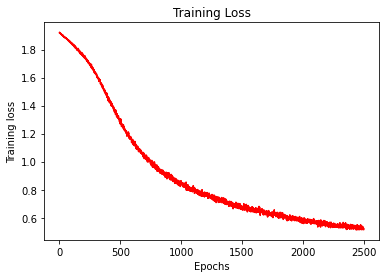

In [95]:
plt.figure()
plt.title('Training Process')
plt.plot(range(len(loss_trains)), loss_trains, color='r')
# plt.plot(range(len(loss_trains)), loss_trains, color='r')
plt.ylabel('Training loss')
plt.xlabel('Epochs')
plt.savefig('training_loss.pdf')
plt.show()

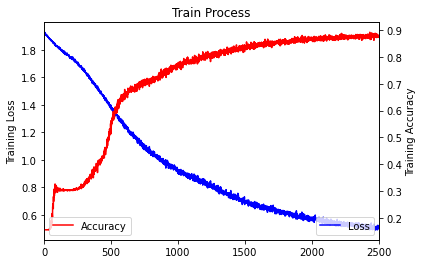

In [135]:
x = np.arange(0., len(loss_trains), 1)
y1 = loss_trains
y2 = acc_trains

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, y1, 'b', label='Loss')
ax1.set_ylabel('Training Loss')
ax1.set_title("Train Process")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r', label='Accuracy')
ax2.set_xlim([0, len(loss_trains)])
ax2.set_ylabel('Training Accuracy')
ax2.set_xlabel('Epochs')
ax1.legend(loc='lower right')
ax2.legend(loc='lower left')
plt.savefig('Training Process.png')
plt.show()

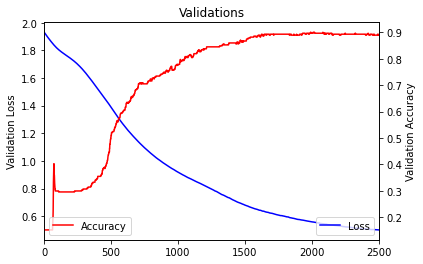

In [136]:
x = np.arange(0., len(loss_vals), 1)
y1 = loss_vals
y2 = acc_vals

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, y1, 'b', label='Loss')
ax1.set_ylabel('Validation Loss')
ax1.set_title("Validations")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r', label='Accuracy')
ax2.set_xlim([0, len(loss_trains)])
ax2.set_ylabel('Validation Accuracy')
ax2.set_xlabel('Epochs')
ax1.legend(loc='lower right')
ax2.legend(loc='lower left')
plt.savefig('Validations.png')
plt.show()